### Canadian Ice Islands Drift from Polar Data Catalogue
Downloaded on September 4th from https://www.polardata.ca/pdcsearch/PDCSearch.jsp?doi_id=12678

Dataset includes info on Ice Islands formed after 3 massive calving (breaking off) events from the Petermann Glacier in 2008, 2010, and 2012.

Dataset comes in two parts:
- shp and shx files which contain the geometry field, which is a list of vertices that make up a polygon that represents the island (requires geopandas to be read and worked on, but can then be merged into a normal dataframe with the other fields)
- csv with all other fields

Not clear how to tell when lineage points to previous observation of the same island, and when it points to a mother. From observing a number of "child-parent" pairs (at the end of notebook), looks like the majority is just two observations of same island.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import gdal
import shapely

In [6]:
df = pd.read_csv('../data/CCIN12678_20181113_CI2D3_01.csv')
gdf = gpd.read_file('../data/CCIN12678_20181113_CI2D3_01.shp')
gdf = gpd.GeoDataFrame(pd.concat([df, gdf], axis=1))
gdf

,Unnamed: 0,inst,lineage,calvingyr,calvingloc,area,perimeter,length,lon,lat,scenedate,imgref,mothercert,shpcert,georef,ddinfo,sensor,beam_mode,pol,geometry
0,1,20080713_235233_es_0_JWC,20080710_234704_es_0_P08,2008,PG,30.0189,32.1042,11202.000,-61.961521,81.088633,2008-07-13 23:52:33,20080713_235233_es_wsm___hh_a_lcc.tif,1,1,0-100m,drifting,es,wsm,hh,"POLYGON ((642583.831 4737010.036, 642584.251 4..."
1,2,20080718_161758_es_0_PUX,20080717_232648_es_0_AXI,2008,PG,5.0768,11.7517,4073.650,-61.748242,81.208505,2008-07-18 16:17:58,20080718_161758_es_wsm___hh_a_lcc.tif,1,1,0-100m,drifting,es,wsm,hh,"POLYGON ((635685.431 4748873.084, 635609.481 4..."
2,3,20080716_153449_es_3_POU,20080715_160601_es_2_KOE,2008,PG,0.2334,1.8947,663.533,-61.936536,81.094799,2008-07-16 15:34:49,20080716_153449_es_wsm___hh_a_lcc.tif,2,2,0-100m,drifting,es,wsm,hh,"POLYGON ((639153.035 4737837.194, 639121.726 4..."
3,4,20080714_163628_es_0_XKK,20080713_235233_es_0_JWC,2008,PG,30.0189,32.1042,11202.000,-62.001971,81.099975,2008-07-14 16:36:28,20080714_163628_es_wsm___hh_a_lcc.tif,1,1,0-100m,drifting,es,wsm,hh,"POLYGON ((641252.930 4737727.132, 641254.149 4..."
4,5,20080716_235405_es_0_UJN,20080716_153449_es_0_SMD,2008,PG,5.3063,11.9201,4132.140,-61.716621,81.204665,2008-07-16 23:54:05,20080716_235405_es_wsm___hh_a_lcc.tif,1,1,0-100m,drifting,es,wsm,hh,"POLYGON ((637178.217 4750031.227, 637124.459 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25359,25360,20131230_105824_r2_1_LZV,20131229_112720_r2_4_BTE,NA,RG,4.9236,8.7757,3093.020,-67.536853,68.631616,2013-12-30 10:58:24,20131230_105824_r2_scwa__hx_a_lcc.tif,1,2,0-100m,trapped,r2,scwa,hx,"POLYGON ((1228172.494 3478754.513, 1228177.793..."
25360,25361,20131230_105824_r2_0_VNJ,20131229_112720_r2_3_PTW,NA,RG,7.3202,11.4445,4575.050,-69.032463,71.439792,2013-12-30 10:58:24,20131230_105824_r2_scwa__hx_a_lcc.tif,1,2,0-100m,drifting,r2,scwa,hx,"POLYGON ((1036262.965 3721983.236, 1036301.407..."
25361,25362,20131231_202545_r2_1_KQF,20131229_212329_r2_10_DRL,NA,RG,1.8252,5.7343,2233.030,-71.507132,79.430857,2013-12-31 20:25:45,20131231_202545_r2_scwa__hx_a_lcc.tif,1,2,>400m,drifting,r2,scwa,hx,"POLYGON ((574285.650 4482190.007, 574301.723 4..."
25362,25363,20131231_220506_r2_1_YGC,20131231_202545_r2_1_KQF,NA,RG,1.5283,5.4587,2176.170,-71.590018,79.412478,2013-12-31 22:05:06,20131231_220506_r2_scwa__hx_a_lcc.tif,1,2,200-400m,drifting,r2,scwa,hx,"POLYGON ((573416.931 4479585.572, 573453.165 4..."


<AxesSubplot:>

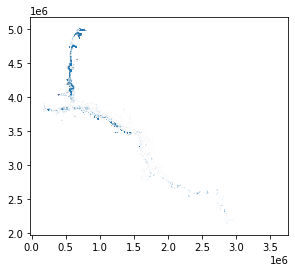

In [7]:
gdf.plot()

In [37]:
gdf.memory_usage().sum()

4058368

In [11]:
import matplotlib.pyplot as plt
gdf.plot()
plt.savefig('polygon_plot.png')
plt.show()

full_gdf = gpd.GeoDataFrame(pd.concat([df, gdf], axis=1))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25364 entries, 0 to 25363
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25364 non-null  int64  
 1   inst        25364 non-null  object 
 2   lineage     25364 non-null  object 
 3   calvingyr   25364 non-null  object 
 4   calvingloc  25358 non-null  object 
 5   area        25364 non-null  float64
 6   perimeter   25364 non-null  float64
 7   length      25364 non-null  float64
 8   lon         25364 non-null  float64
 9   lat         25364 non-null  float64
 10  scenedate   25364 non-null  object 
 11  imgref      25364 non-null  object 
 12  mothercert  25364 non-null  int64  
 13  shpcert     25364 non-null  int64  
 14  georef      25151 non-null  object 
 15  ddinfo      25364 non-null  object 
 16  sensor      25364 non-null  object 
 17  beam_mode   25364 non-null  object 
 18  pol         25364 non-null  object 
dtypes: float64(5), int64(3), 

### Column Details
- inst       object: Unique Identifier for an Ice Island
- lineage    object: Identifier for its Mother/Parent Ice Island OR for previous observation of the same island. 25054 entries point to one of 310 entries, whose parents are not in the dataset.
- calvingyr  object: Year of Calving (when an ice island breaks off from parent). Missing 7456 entries, labeled as 'NA  '
- calvingloc object: Location of Calving. Missing 6 entries
- area       float64: 
- perimeter  float64
- length     float64
- lon        float64
- lat        float64
- scenedate  object 
- imgref     object 
- mothercert int64: certainty of lineage. Majority (85%) is very certain
- shpcert    int64: certainty of shape. Less certain (Very certain: 59%, fairly certain: 36%)
- georef     object:
- ddinfo     object 
- sensor     object 
- beam_mode  object 
- pol        object

![title](../documents/polar_data_documentation1.png)
![title](../documents/polar_data_documentation2.png)
![title](../documents/polar_data_appendix2.png)

In [6]:
print(f'Number of rows: {len(df)}')
for col in list(df):
    print(f'Number of Unique instances of {col}: {len(df[col].unique())}')

Number of rows: 25364
Number of Unique instances of Unnamed: 0: 25364
Number of Unique instances of inst: 25364
Number of Unique instances of lineage: 24470
Number of Unique instances of calvingyr: 6
Number of Unique instances of calvingloc: 6
Number of Unique instances of area: 2815
Number of Unique instances of perimeter: 2946
Number of Unique instances of length: 2546
Number of Unique instances of lon: 23803
Number of Unique instances of lat: 23803
Number of Unique instances of scenedate: 4378
Number of Unique instances of imgref: 4378
Number of Unique instances of mothercert: 3
Number of Unique instances of shpcert: 3
Number of Unique instances of georef: 5
Number of Unique instances of ddinfo: 5
Number of Unique instances of sensor: 4
Number of Unique instances of beam_mode: 39
Number of Unique instances of pol: 6


In [44]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
display_missing(df)

Unnamed: 0 column missing values: 0
inst column missing values: 0
lineage column missing values: 0
calvingyr column missing values: 0
calvingloc column missing values: 6
area column missing values: 0
perimeter column missing values: 0
length column missing values: 0
lon column missing values: 0
lat column missing values: 0
scenedate column missing values: 0
imgref column missing values: 0
mothercert column missing values: 0
shpcert column missing values: 0
georef column missing values: 213
ddinfo column missing values: 0
sensor column missing values: 0
beam_mode column missing values: 0
pol column missing values: 0




#### lineage

In [21]:
count_found, count_not_found = 0, 0
inst_set = set(df['inst'].values)
for parent in df['lineage']:
    if parent in inst_set:
        count_found += 1
    else:
        count_not_found += 1
print(f'{count_found} parents are in the dataset, {count_not_found} are not.')

25054 parents are in the dataset, 310 are not.


In [36]:
import random
inst_set = set(df['inst'].values)
for idx in random.sample(list(df.index), 20):
    curr_idx = idx
    print(df['inst'][curr_idx], end='')
    while True:
        parent = df['lineage'][curr_idx]
        if str(parent) == str(df['inst'][curr_idx]):
            print(' -> Points to Self')
            break
        elif str(parent) not in inst_set:
            print(' -> Parent not in Dataset')
            break
        else:
            print(f' -> {parent}', end='')
            curr_idx = df[df['inst'] == parent].index

20120211_102504_r2_1_AAE -> 20120210_105416_r2_1_VVJ -> Parent not in Dataset
20110705_215129_r1_0_KUK -> 20110628_215454_r1_0_MBF -> Parent not in Dataset
20120318_094018_r2_0_CZW -> 20120317_213235_r2_0_EAA -> Parent not in Dataset
20130204_105540_r2_3_WVI -> 20130122_103316_r2_4_SIE -> Parent not in Dataset
20110925_215913_r1_0_JDA -> 20110924_214236_r2_0_ZCR -> Parent not in Dataset
20121017_124120_r2_12_FGY -> 20121015_115929_r2_15_NCX -> Parent not in Dataset
20110924_123523_r1_1_DDI -> 20110923_221224_r2_2_LHH -> Parent not in Dataset
20130719_221257_r2_0_QRG -> 20130719_104419_r2_0_KPZ -> Parent not in Dataset
20131228_115525_r2_0_IDH -> 20131227_122410_r2_5_OLP -> Parent not in Dataset
20120811_115352_r2_29_HEV -> 20120810_122308_r2_30_ASI -> Parent not in Dataset
20100813_233543_es_8_DQV -> 20100812_154328_es_5_TKT -> Parent not in Dataset
20130505_220305_r2_2_EUQ -> 20130504_223320_r2_3_VRE -> Parent not in Dataset
20130908_123038_r2_41_SMR -> 20130829_204210_r2_51_WZV -> Pa

In [39]:
from collections import defaultdict
nid_freq_dict = defaultdict(int)
pts_freq_dict = defaultdict(int)
for idx in list(df.index):
    lineage_length = 1
    curr_idx = idx
    while True:
        parent = df['lineage'][curr_idx]
        if str(parent) == str(df['inst'][curr_idx]):
            pts_freq_dict[lineage_length] += 1
            break
        elif str(parent) not in inst_set:
            lineage_length += 1
            nid_freq_dict[lineage_length] += 1
            break
        else:
            lineage_length += 1
            curr_idx = df[df['inst'] == parent].index
print(f'Dict for lineages that end in NOT IN DATASET: {nid_freq_dict}')
print(f'Dict for lineages that end in SELF REFERENCE: {pts_freq_dict}')

Dict for lineages that end in NOT IN DATASET: defaultdict(<class 'int'>, {2: 310, 3: 25054})
Dict for lineages that end in SELF REFERENCE: defaultdict(<class 'int'>, {})


#### calvingyr and calvingloc

In [40]:
print(f'Unique calvingyr: {df.calvingyr.unique()}')
print(f'Unique calvingloc: {df.calvingloc.unique()}')

Unique calvingyr: ['2008' '2010' '2011' '2012' '2013' 'NA  ']
Unique calvingloc: ['PG' 'SG' nan 'RG' 'NG' 'CG']


In [42]:
df.calvingyr[df.calvingyr == 'NA  '].count()

7456

In [10]:
df.mothercert.value_counts()

1    21130
3     2455
2     1779
Name: mothercert, dtype: int64

In [11]:
df.shpcert.value_counts()

2    14868
1     9222
3     1274
Name: shpcert, dtype: int64

In [12]:
df.georef.value_counts()

>400m       8863
200-400m    7923
0-100m      4222
100-200m    4143
Name: georef, dtype: int64

In [13]:
df.ddinfo.value_counts()

drifting     13237
grounded?     4243
trapped       4210
grounded      3534
trapped?       140
Name: ddinfo, dtype: int64

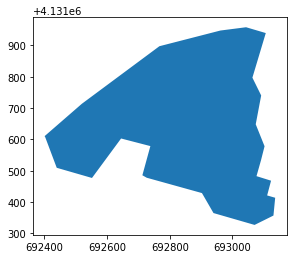

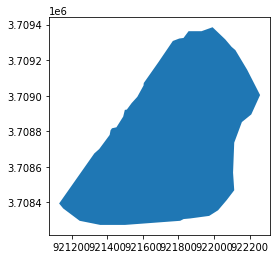

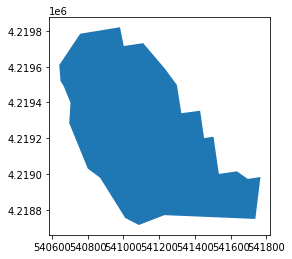

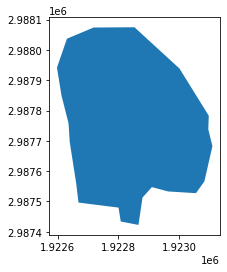

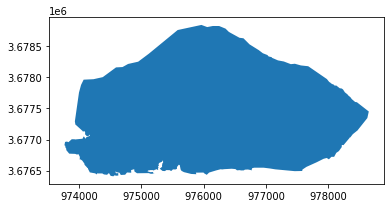

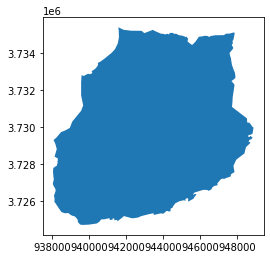

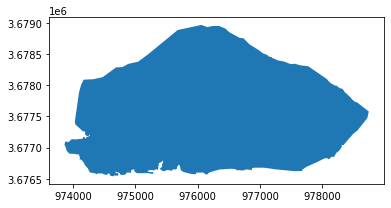

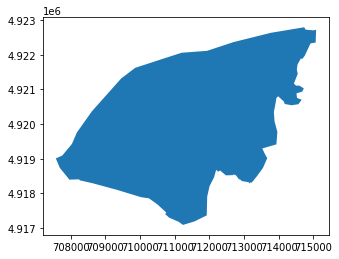

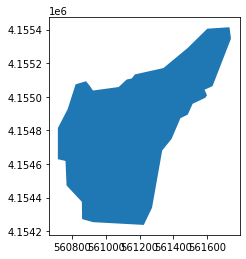

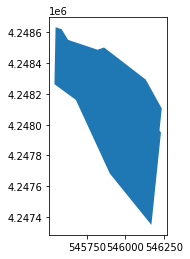

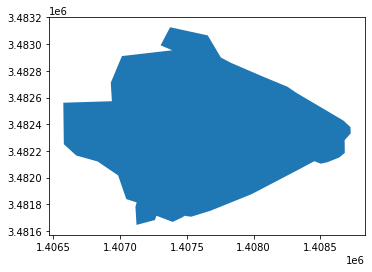

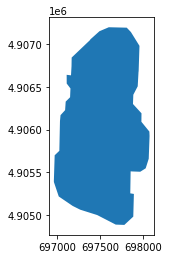

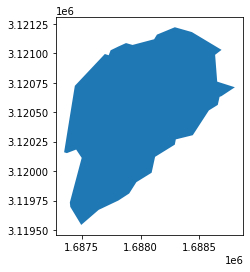

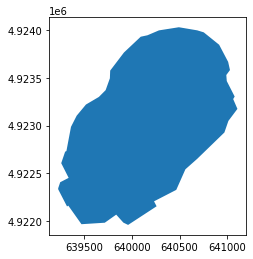

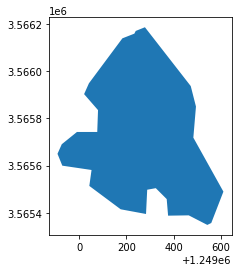

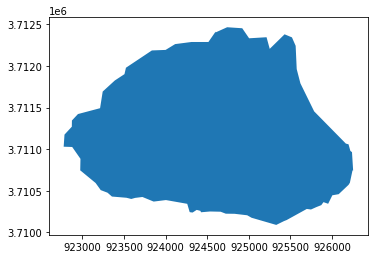

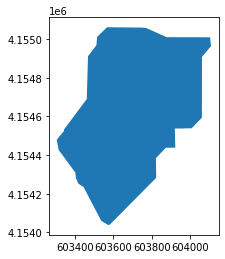

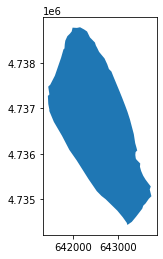

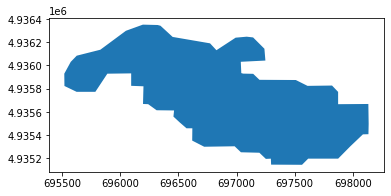

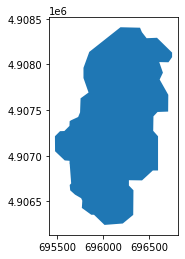

In [22]:
import random
for poly in random.sample(gdf['geometry'].to_list(), 20):
    gpd.GeoSeries(poly).plot()

Child: 20110430_113551_r2_3_QTN
Parent: 20110423_213437_r2_2_VHF
Child: 20120214_103849_r2_0_PVZ
Parent: 20120212_212820_r2_0_TSV
Child: 20101024_211509_r2_8_KTJ
Parent: 20101009_115332_r2_7_QHZ
Child: 20120827_122643_r2_63_EHK
Parent: 20120827_104612_r2_66_NEL
Child: 20120926_215855_r1_5_GUF
Parent: 20120923_205859_r2_4_ETF
Child: 20110604_215238_r1_1_LTW
Parent: 20110604_102433_r1_1_YZE
Child: 20130721_212015_r2_7_EBZ
Parent: 20130707_212832_r2_6_QDG
Child: 20130828_125253_r2_6_EBN
Parent: 20130827_214006_r2_11_JGU
Child: 20131224_103447_r2_0_YCR
Parent: 20131221_215322_r2_0_UFM
Child: 20120805_112802_r2_36_MSM
Parent: 20120729_195239_r2_46_HCD
Child: 20130713_215050_r2_7_BKZ


c:\users\rapha\appdata\local\programs\python\python38\lib\site-packages\geopandas\plotting.py:358: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


Parent: 20130712_104601_r2_2_ISJ
Child: 20130919_220858_r2_2_GEU
Parent: 20130919_121237_r2_2_OSM
Child: 20120827_122643_r2_86_GRR
Parent: 20120827_104612_r2_88_GCT
Child: 20120402_103903_r2_1_HHE
Parent: 20120331_212829_r2_2_VQN
Child: 20111125_213329_r2_3_MJY
Parent: 20111124_220208_r2_0_DVW
Child: 20120624_214852_r2_1_GOW
Parent: 20120623_104828_r2_0_ABX
Child: 20110807_214145_r2_2_SQF
Parent: 20110806_103702_r2_2_CVI
Child: 20131225_214003_r2_3_KLH
Parent: 20131224_121137_r2_3_QCU
Child: 20130310_191908_r2_58_ICV
Parent: 20130210_193551_r2_58_NVO
Child: 20120724_104150_r2_7_PPK
Parent: 20120723_111100_r2_4_VGH


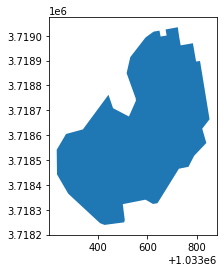

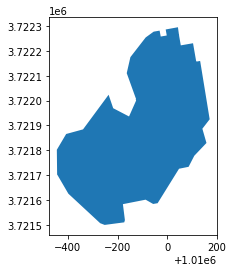

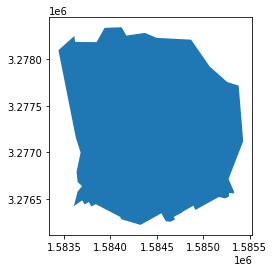

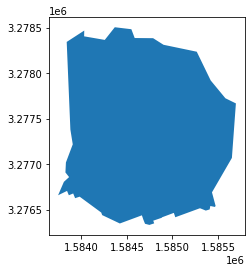

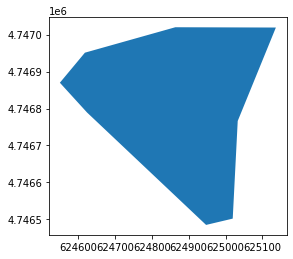

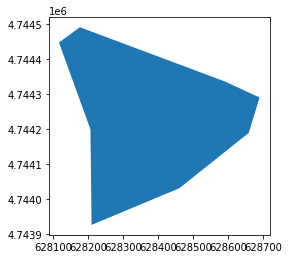

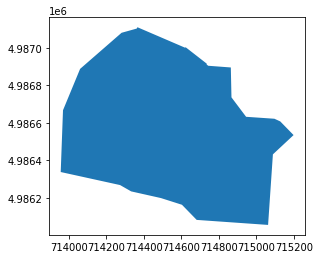

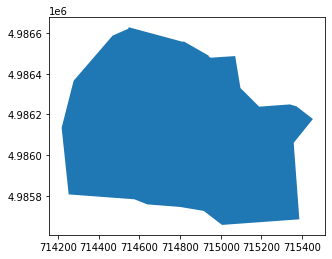

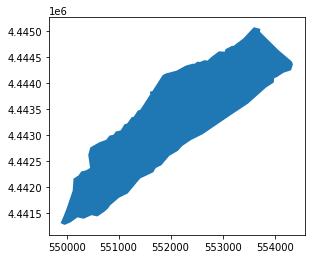

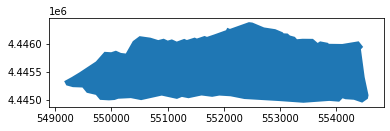

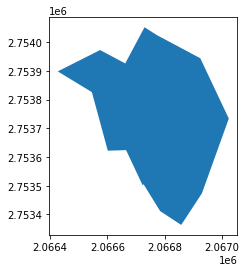

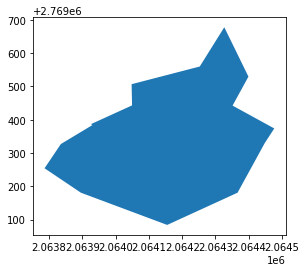

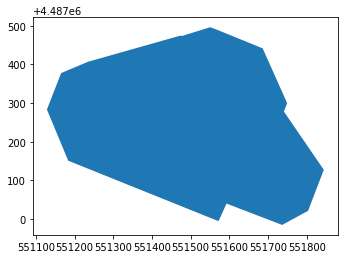

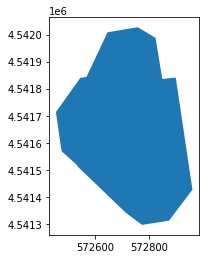

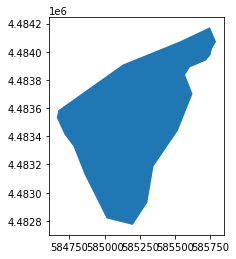

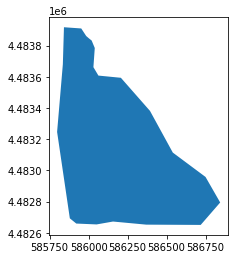

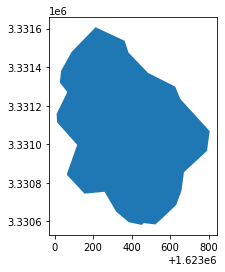

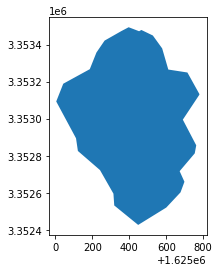

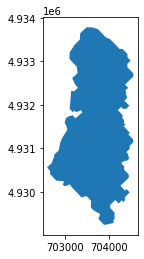

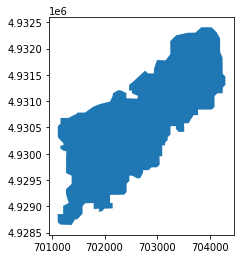

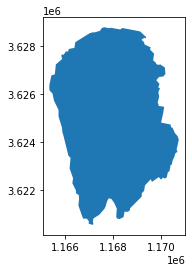

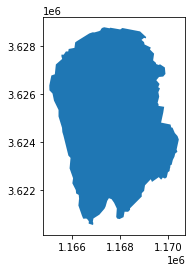

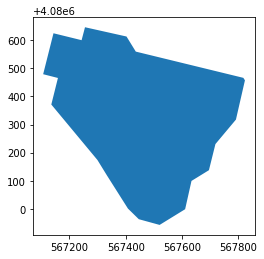

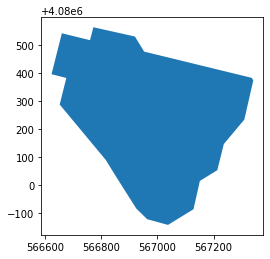

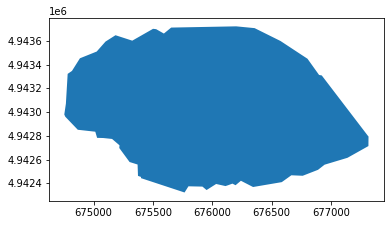

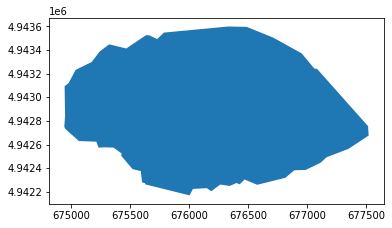

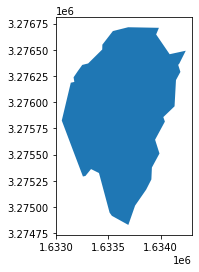

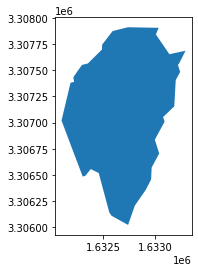

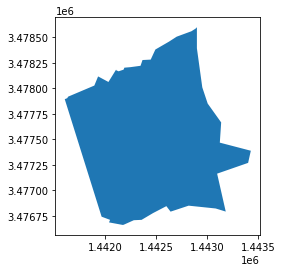

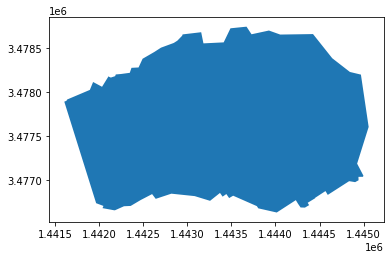

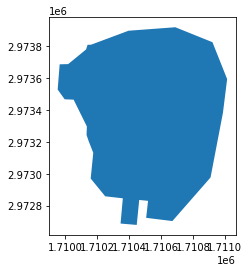

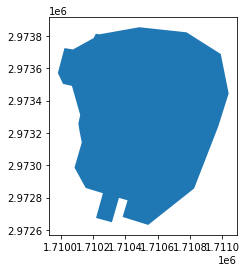

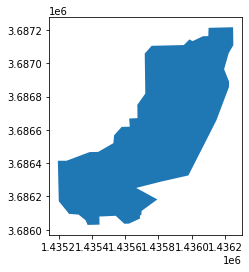

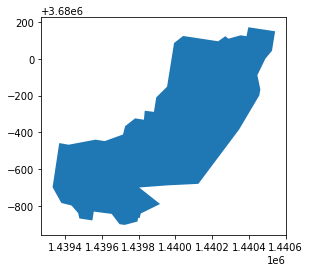

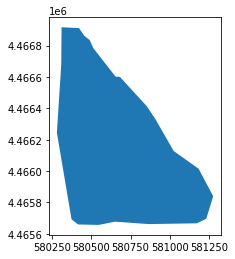

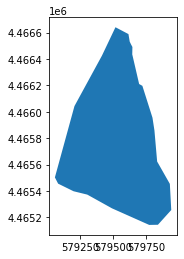

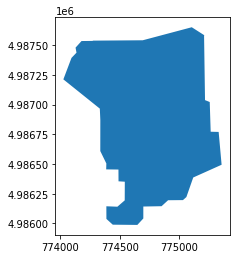

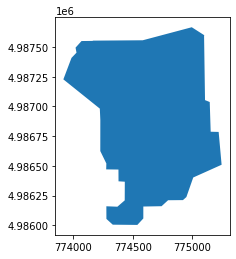

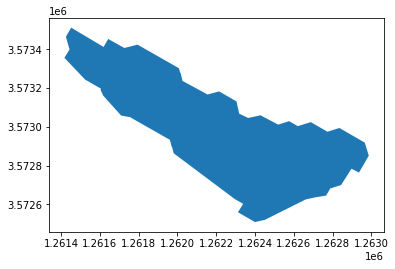

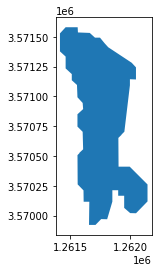

In [35]:
for i in random.sample(gdf.index.to_list(), 20):
    child = gdf.at[i, 'inst']
    print(f'Child: {child}')
    gpd.GeoSeries(gdf.loc[i, 'geometry']).plot()
    parent = gdf.loc[i, 'lineage']
    if parent in gdf.inst.values:
        parent_idx = gdf.index[gdf.inst == parent]
        print(f'Parent: {parent}')
        gpd.GeoSeries(gdf.loc[parent_idx, 'geometry']).plot()
    else:
        print('Parent: Not in dataset')

292669098.27983415


<AxesSubplot:>

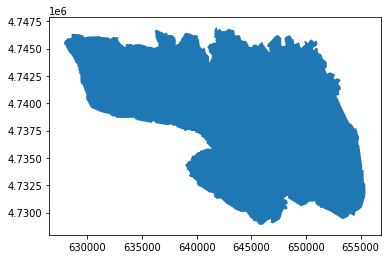

In [43]:
print(gdf.area.max())
gpd.GeoSeries(gdf.loc[gdf.area.idxmax(), 'geometry']).plot()

9489.850770448831


<AxesSubplot:>

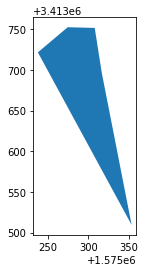

In [45]:
print(gdf.area.min())
gpd.GeoSeries(gdf.loc[gdf.area.idxmin(), 'geometry']).plot()